Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

np.int64(1)

In [4]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing the data

Encoding the integer sequences via multi-hot encoding

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the model different configurations

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

1. (Question 1) Building the model with 1 hidden layer (model_1_HL)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. (Question 1) Building the model with 3 hidden layer (model_3_hl)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

3. (Question 2) Building the model with fewer hidden units 32 (model_32_HU)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4. (Question 2) Building the model with higher hidden units 64 (model64_HU)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. (Question 3) Building the base model with mse loss function (model_mse)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


6. (Question 4) Building the model with tanh activation

In [15]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

7. (Question 5) Building the model with regularization (model_reg)

In [16]:
from tensorflow.keras import regularizers

model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. (Question 5) Building the model with dropout (model_drp)

In [17]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Creating a validation set

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

### 0. Base model

In [19]:
Base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7014 - loss: 0.6103 - val_accuracy: 0.8596 - val_loss: 0.4286
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8921 - loss: 0.3656 - val_accuracy: 0.8815 - val_loss: 0.3263
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9170 - loss: 0.2641 - val_accuracy: 0.8886 - val_loss: 0.2885
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9375 - loss: 0.2044 - val_accuracy: 0.8802 - val_loss: 0.2998
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9444 - loss: 0.1697 - val_accuracy: 0.8832 - val_loss: 0.2890
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9580 - loss: 0.1380 - val_accuracy: 0.8801 - val_loss: 0.3078
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9639 - loss: 0.1208 - val_accuracy: 0.8848 - val_loss: 0.2936
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9752 - loss: 0.0994 - val_accuracy: 0.8807 - v

In [20]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

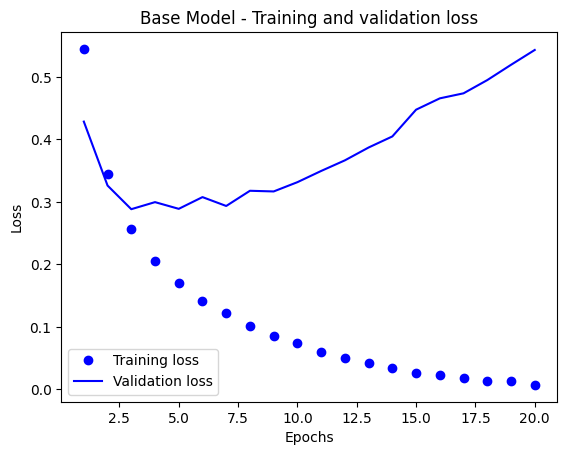

In [21]:
import matplotlib.pyplot as plt
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)
plt.plot(epochs, loss_values_0, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_0, "b", label="Validation loss")
plt.title("Base Model - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

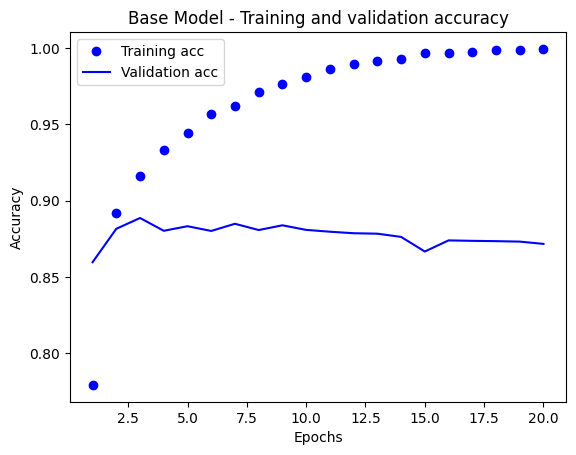

In [22]:
plt.clf()
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]
plt.plot(epochs, acc_0, "bo", label="Training acc")
plt.plot(epochs, val_acc_0, "b", label="Validation acc")
plt.title("Base Model - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
Base_model_results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7323 - loss: 0.5587
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9061 - loss: 0.2838
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9274 - loss: 0.2144
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9390 - loss: 0.1731
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.2913


In [24]:
Base_model_results

[0.2899335026741028, 0.8844000101089478]

Using Trained data to predict

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.16773435],
       [0.9989935 ],
       [0.56867605],
       ...,
       [0.10858914],
       [0.06415939],
       [0.52861786]], dtype=float32)

### 1. Model With 1 Hidden Layer

In [26]:
Model_1_Hidden_Layer = model_1_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7148 - loss: 0.5805 - val_accuracy: 0.8678 - val_loss: 0.4012
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8934 - loss: 0.3508 - val_accuracy: 0.8500 - val_loss: 0.3618
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9101 - loss: 0.2773 - val_accuracy: 0.8887 - val_loss: 0.2983
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9291 - loss: 0.2311 - val_accuracy: 0.8767 - val_loss: 0.3031
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9363 - loss: 0.2023 - val_accuracy: 0.8893 - val_loss: 0.2792
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9476 - loss: 0.1740 - val_accuracy: 0.8789 - val_loss: 0.2966
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9519 - loss: 0.1575 - val_accuracy: 0.8872 - val_loss: 0.2761
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9573 - loss: 0.1446 - val_accuracy: 0.8881 - v

In [27]:
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

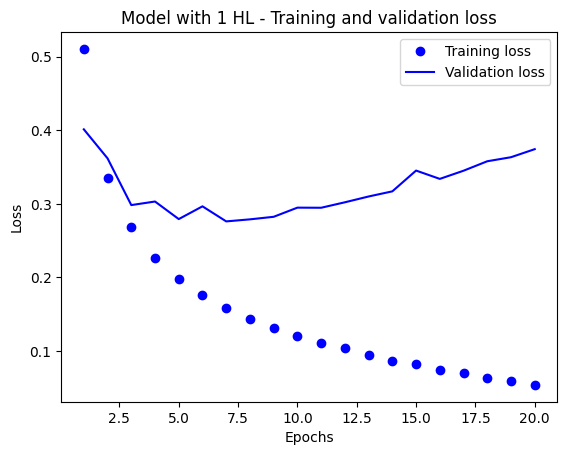

In [28]:
import matplotlib.pyplot as plt
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Model with 1 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

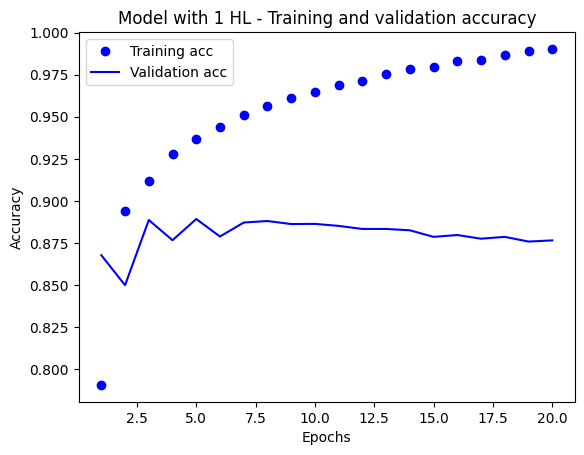

In [29]:
plt.clf()
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [30]:
model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_HL.fit(x_train, y_train, epochs=4, batch_size=512)
Model_1_Hidden_Layer_Results = model_1_HL.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7580 - loss: 0.5288
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9034 - loss: 0.2909
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9218 - loss: 0.2308
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9324 - loss: 0.1969
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.2796


In [31]:
Model_1_Hidden_Layer_Results

[0.27805599570274353, 0.8889999985694885]

Using Trained data to predict

In [32]:
model_1_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step


array([[0.25200632],
       [0.9994847 ],
       [0.80503315],
       ...,
       [0.1090954 ],
       [0.11686157],
       [0.56205916]], dtype=float32)

### 2. Model With 3 Hidden Layer

In [33]:
Model_3_Hidden_Layer = model_3_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6490 - loss: 0.6477 - val_accuracy: 0.8483 - val_loss: 0.4578
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8823 - loss: 0.3922 - val_accuracy: 0.8788 - val_loss: 0.3287
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9164 - loss: 0.2676 - val_accuracy: 0.8756 - val_loss: 0.3124
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9351 - loss: 0.2015 - val_accuracy: 0.8904 - val_loss: 0.2747
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9466 - loss: 0.1622 - val_accuracy: 0.8831 - val_loss: 0.2940
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9597 - loss: 0.1294 - val_accuracy: 0.8864 - val_loss: 0.2886
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9687 - loss: 0.1043 - val_accuracy: 0.8822 - val_loss: 0.3056
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9776 - loss: 0.0830 - val_accuracy: 0.8809 - v

In [34]:
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

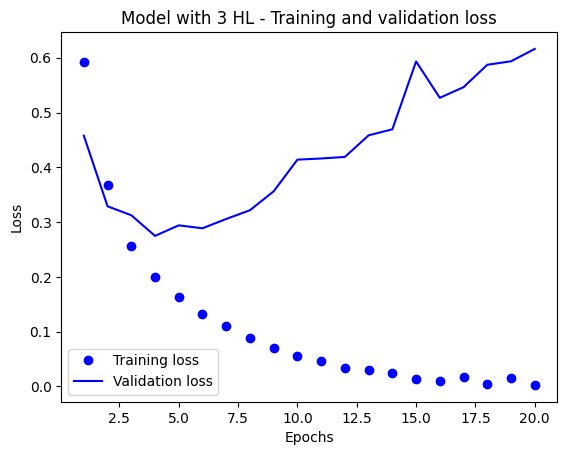

In [35]:
import matplotlib.pyplot as plt
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

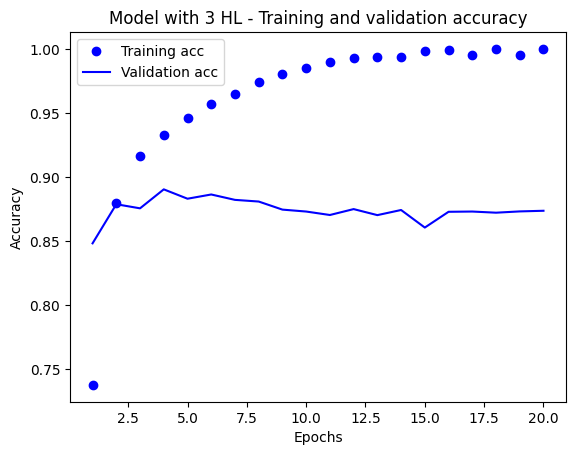

In [36]:
plt.clf()
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [37]:
model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3_HL.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hidden_Layer_Results = model_3_HL.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7056 - loss: 0.5859
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8956 - loss: 0.2969
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9274 - loss: 0.2092
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9332 - loss: 0.1820
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9453 - loss: 0.1536
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9561 - loss: 0.1306
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8734 - loss: 0.3395


In [38]:
Model_3_Hidden_Layer_Results

[0.33944687247276306, 0.8734800219535828]

Using Trained data to predict

In [39]:
model_3_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step


array([[0.1187803 ],
       [0.99978215],
       [0.34673277],
       ...,
       [0.08698317],
       [0.03702383],
       [0.50758153]], dtype=float32)

### 3. Model With 32 Hidden Units

In [40]:
Model_32_Hidden_Units = model_32_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6903 - loss: 0.5947 - val_accuracy: 0.8704 - val_loss: 0.3712
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8875 - loss: 0.3275 - val_accuracy: 0.8726 - val_loss: 0.3211
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9190 - loss: 0.2411 - val_accuracy: 0.8900 - val_loss: 0.2787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9370 - loss: 0.1850 - val_accuracy: 0.8766 - val_loss: 0.3087
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9461 - loss: 0.1592 - val_accuracy: 0.8846 - val_loss: 0.2918
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9602 - loss: 0.1254 - val_accuracy: 0.8786 - val_loss: 0.3201
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9692 - loss: 0.1035 - val_accuracy: 0.8838 - val_loss: 0.3100
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9733 - loss: 0.0869 - val_accuracy: 0.8612 - v

In [41]:
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

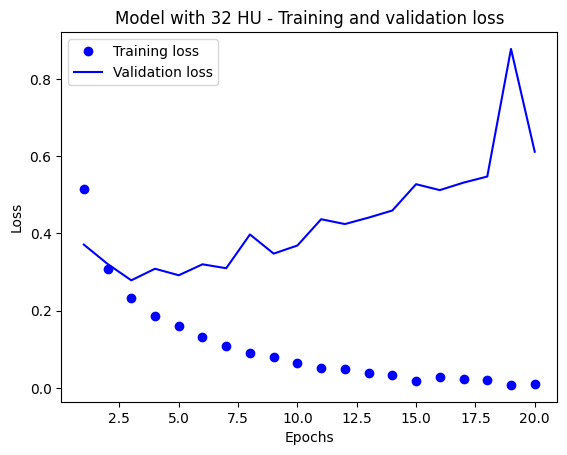

In [42]:
import matplotlib.pyplot as plt
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

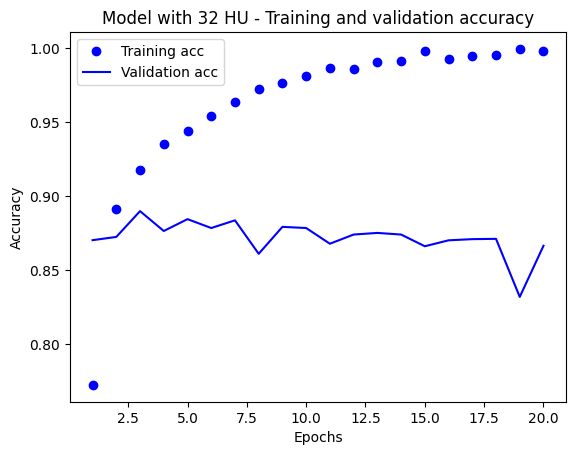

In [43]:
plt.clf()
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [44]:
model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_32_HU.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_32_Hidden_Units_Results = model_32_HU.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7471 - loss: 0.5403
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9019 - loss: 0.2732
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9242 - loss: 0.2108
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.2805


In [45]:
Model_32_Hidden_Units_Results

[0.2790377736091614, 0.8881999850273132]

Using Trained data to predict

In [46]:
model_32_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.28207788],
       [0.99980515],
       [0.8458136 ],
       ...,
       [0.10173313],
       [0.08543255],
       [0.5752077 ]], dtype=float32)

### 4. Model With 64 Hidden Units

In [47]:
Model_64_Hidden_Units = model_64_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6699 - loss: 0.5912 - val_accuracy: 0.8735 - val_loss: 0.3475
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8759 - loss: 0.3274 - val_accuracy: 0.8480 - val_loss: 0.3663
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9074 - loss: 0.2462 - val_accuracy: 0.8907 - val_loss: 0.2747
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9359 - loss: 0.1798 - val_accuracy: 0.8854 - val_loss: 0.2847
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9529 - loss: 0.1406 - val_accuracy: 0.8809 - val_loss: 0.2938
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9589 - loss: 0.1211 - val_accuracy: 0.8797 - val_loss: 0.3067
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9724 - loss: 0.0926 - val_accuracy: 0.8802 - val_loss: 0.3235
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9751 - loss: 0.0821 - val_accuracy: 0.8733 - v

In [48]:
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

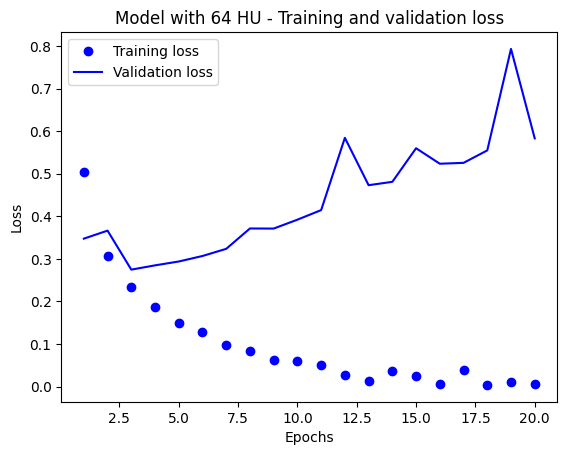

In [49]:
import matplotlib.pyplot as plt
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

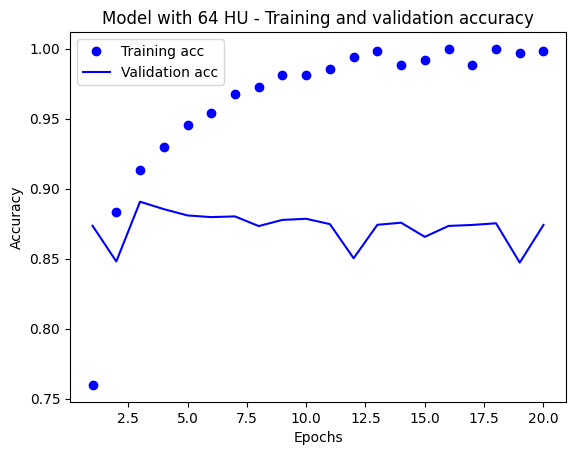

In [50]:
plt.clf()
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [51]:
model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_64_HU.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_64_Hidden_Units_Results = model_64_HU.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7367 - loss: 0.5418
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8958 - loss: 0.2674
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8872 - loss: 0.2819


In [52]:
Model_64_Hidden_Units_Results

[0.2827465236186981, 0.8867599964141846]

Using Trained data to predict

In [53]:
model_64_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.22043663],
       [0.99905795],
       [0.74711007],
       ...,
       [0.1006207 ],
       [0.11690335],
       [0.49460885]], dtype=float32)

### 5. Model With MSE Loss

In [54]:
Model_MSE_LOSS = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6584 - loss: 0.2198 - val_accuracy: 0.8423 - val_loss: 0.1406
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8799 - loss: 0.1164 - val_accuracy: 0.8700 - val_loss: 0.1064
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9099 - loss: 0.0826 - val_accuracy: 0.8882 - val_loss: 0.0896
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9301 - loss: 0.0650 - val_accuracy: 0.8897 - val_loss: 0.0856
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9365 - loss: 0.0574 - val_accuracy: 0.8872 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9528 - loss: 0.0453 - val_accuracy: 0.8849 - val_loss: 0.0834
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9597 - loss: 0.0405 - val_accuracy: 0.8824 - val_loss: 0.0840
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9638 - loss: 0.0364 - val_accuracy: 0.8754 - v

In [55]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

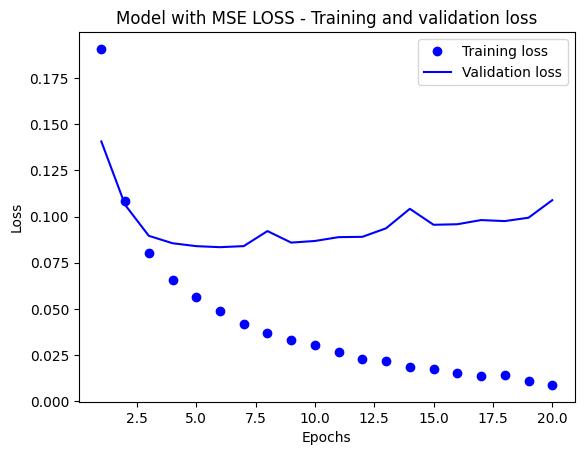

In [56]:
import matplotlib.pyplot as plt
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("Model with MSE LOSS - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

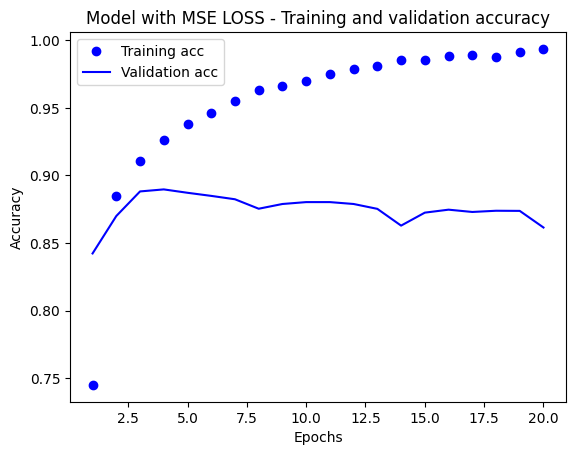

In [57]:
plt.clf()
acc_MSE = Model_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("Model with MSE LOSS - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [58]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
model_mse.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_MSE_LOSS_Results = model_mse.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6900 - loss: 0.2082
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8932 - loss: 0.1023
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9164 - loss: 0.0736
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9293 - loss: 0.0621
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.0876


In [59]:
Model_MSE_LOSS_Results

[0.08660213649272919, 0.8850399851799011]

Using Trained data to predict

In [60]:
model_mse.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.22726934],
       [0.9810342 ],
       [0.91659194],
       ...,
       [0.16536373],
       [0.13981335],
       [0.61443186]], dtype=float32)

### 6. Model With tanh activation

In [61]:
Model_TANH_ACT = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7016 - loss: 0.5778 - val_accuracy: 0.8371 - val_loss: 0.3978
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8952 - loss: 0.3081 - val_accuracy: 0.8889 - val_loss: 0.2887
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9287 - loss: 0.2118 - val_accuracy: 0.8852 - val_loss: 0.2811
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9412 - loss: 0.1683 - val_accuracy: 0.8890 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9580 - loss: 0.1249 - val_accuracy: 0.8818 - val_loss: 0.3008
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9684 - loss: 0.0987 - val_accuracy: 0.8784 - val_loss: 0.3360
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9751 - loss: 0.0792 - val_accuracy: 0.8789 - val_loss: 0.3459
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9826 - loss: 0.0623 - val_accuracy: 0.8777 - v

In [62]:
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

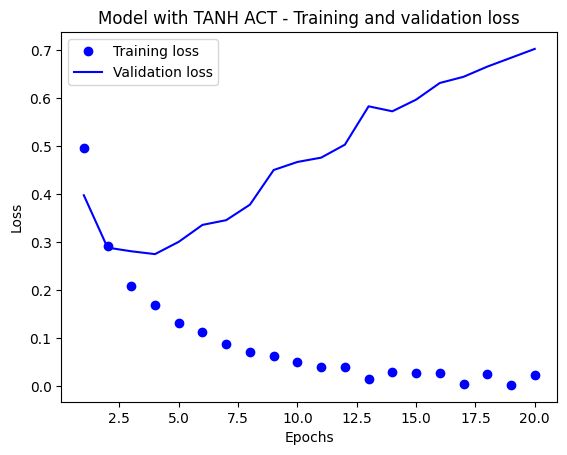

In [63]:
import matplotlib.pyplot as plt
Model_TANH_ACT_dict = Model_TANH_ACT.history
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("Model with TANH ACT - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

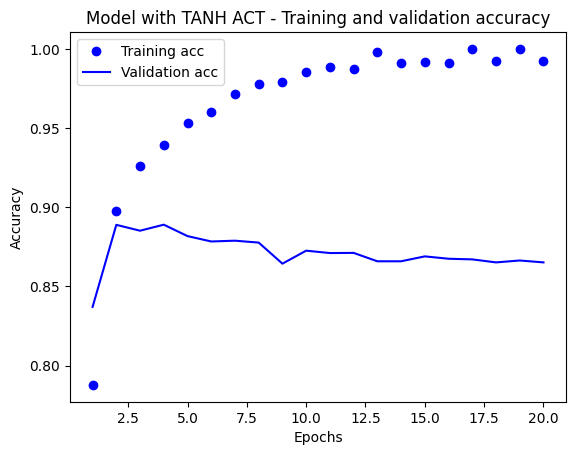

In [64]:
plt.clf()
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("Model with TANH ACT - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [65]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = model_tanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7414 - loss: 0.5346
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9082 - loss: 0.2555
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9304 - loss: 0.1885
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.2923


In [66]:
Model_TANH_ACT_Results

[0.2921496033668518, 0.8808799982070923]

Using Trained data to predict

In [67]:
model_tanh.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.14220224],
       [0.9979248 ],
       [0.7414349 ],
       ...,
       [0.0963598 ],
       [0.06523885],
       [0.5298453 ]], dtype=float32)

### 7. Model With L2 Regularization

In [68]:
Model_Reg_Tech = model_reg.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7061 - loss: 0.6428 - val_accuracy: 0.8584 - val_loss: 0.4428
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8895 - loss: 0.3902 - val_accuracy: 0.8596 - val_loss: 0.4017
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9187 - loss: 0.3021 - val_accuracy: 0.8891 - val_loss: 0.3384
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9289 - loss: 0.2621 - val_accuracy: 0.8873 - val_loss: 0.3322
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9452 - loss: 0.2300 - val_accuracy: 0.8832 - val_loss: 0.3389
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9524 - loss: 0.2105 - val_accuracy: 0.8818 - val_loss: 0.3460
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9588 - loss: 0.1965 - val_accuracy: 0.8843 - val_loss: 0.3500
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9648 - loss: 0.1838 - val_accuracy: 0.8841 - v

In [69]:
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

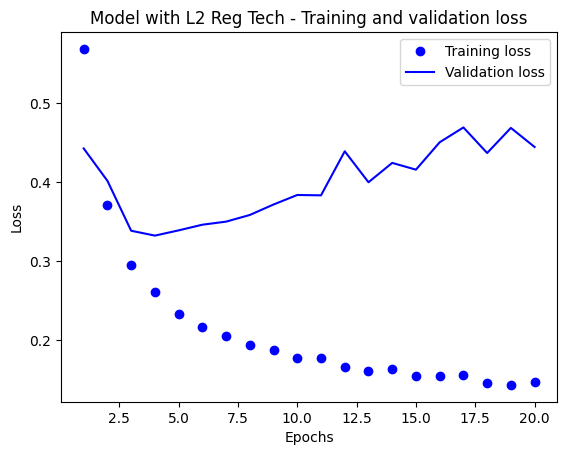

In [70]:
import matplotlib.pyplot as plt
Model_Reg_Tech_dict = Model_Reg_Tech.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("Model with L2 Reg Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

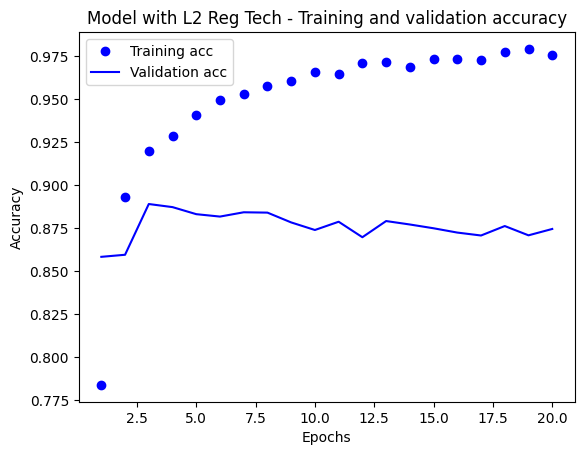

In [71]:
plt.clf()
acc_Reg = Model_Reg_Tech_dict["accuracy"]
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("Model with L2 Reg Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [72]:
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_reg.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Model_Reg_Tech_Results = model_reg.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7347 - loss: 0.6234
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8973 - loss: 0.3648
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8872 - loss: 0.3447


In [73]:
Model_Reg_Tech_Results

[0.3439609408378601, 0.8871999979019165]

Using Trained data to predict

In [74]:
model_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.31110287],
       [0.9841255 ],
       [0.85314435],
       ...,
       [0.17224482],
       [0.18067576],
       [0.55902857]], dtype=float32)

### 8. Model With Dropout Technique`

In [75]:
Model_Drp_Tech = model_drp.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5943 - loss: 0.6638 - val_accuracy: 0.8501 - val_loss: 0.5149
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7544 - loss: 0.5343 - val_accuracy: 0.8566 - val_loss: 0.4121
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8074 - loss: 0.4430 - val_accuracy: 0.8777 - val_loss: 0.3538
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8529 - loss: 0.3772 - val_accuracy: 0.8841 - val_loss: 0.3080
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8780 - loss: 0.3259 - val_accuracy: 0.8863 - val_loss: 0.2886
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8975 - loss: 0.2822 - val_accuracy: 0.8821 - val_loss: 0.2884
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9035 - loss: 0.2660 - val_accuracy: 0.8898 - val_loss: 0.2825
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9206 - loss: 0.2321 - val_accuracy: 0.8895 - v

In [76]:
Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

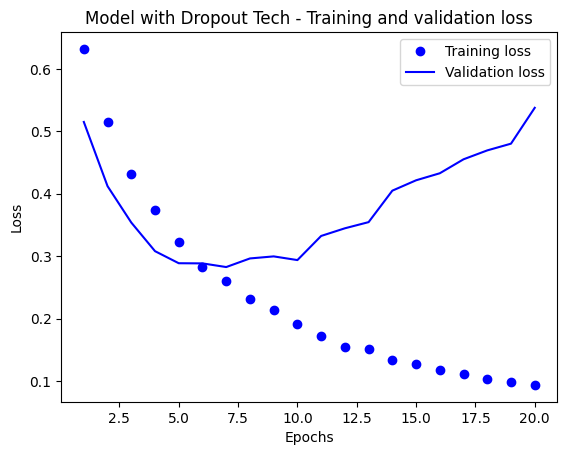

In [77]:
import matplotlib.pyplot as plt
Model_Drp_Tech_dict = Model_Drp_Tech.history
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Model with Dropout Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

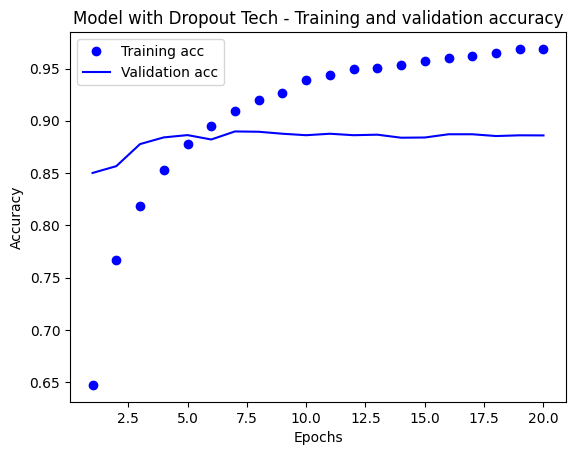

In [78]:
plt.clf()
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Model with Dropout Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [79]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_drp.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Model_Drp_Tech_Results = model_drp.evaluate(x_test, y_test)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5947 - loss: 0.6521
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7776 - loss: 0.4910
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8476 - loss: 0.3912
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8799 - loss: 0.3209
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9055 - loss: 0.2728
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9129 - loss: 0.2411
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9294 - loss: 0.2116
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9319 - loss: 0.1980
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9371 - loss: 0.1818
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8840 - loss: 0.3326


In [80]:
Model_Drp_Tech_Results

[0.32732486724853516, 0.8865200281143188]

Using Trained data to predict

In [81]:
model_drp.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.04534646],
       [0.9999991 ],
       [0.99798524],
       ...,
       [0.08079648],
       [0.03672218],
       [0.7133822 ]], dtype=float32)

### Comparison of the Models

Retrieveing the training history for all models (For Organising)

In [82]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Comparing all the models

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


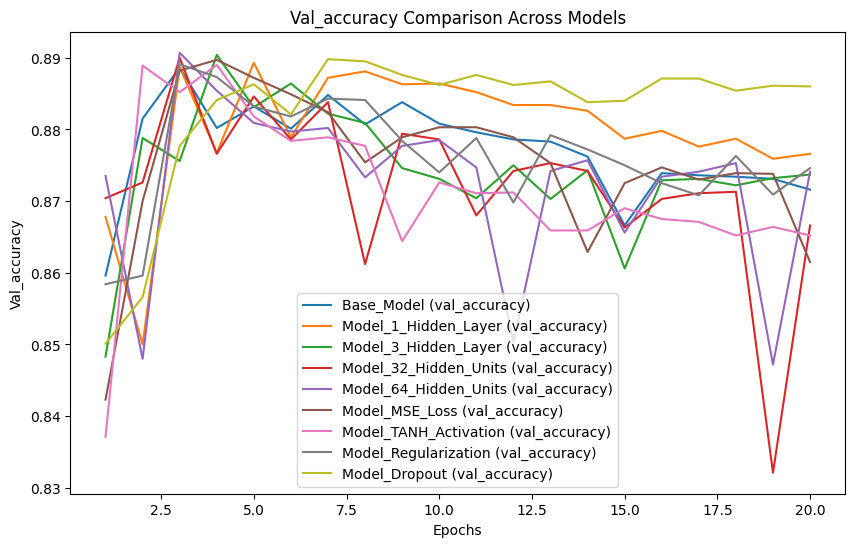

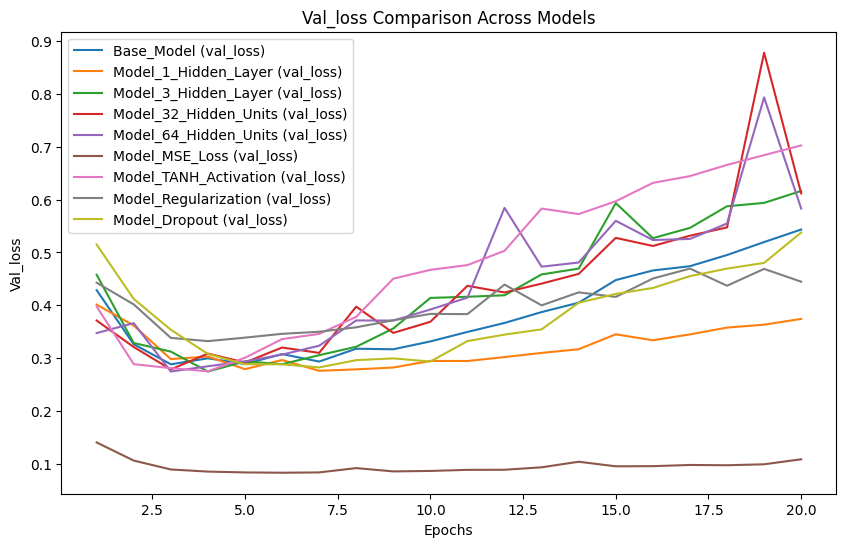

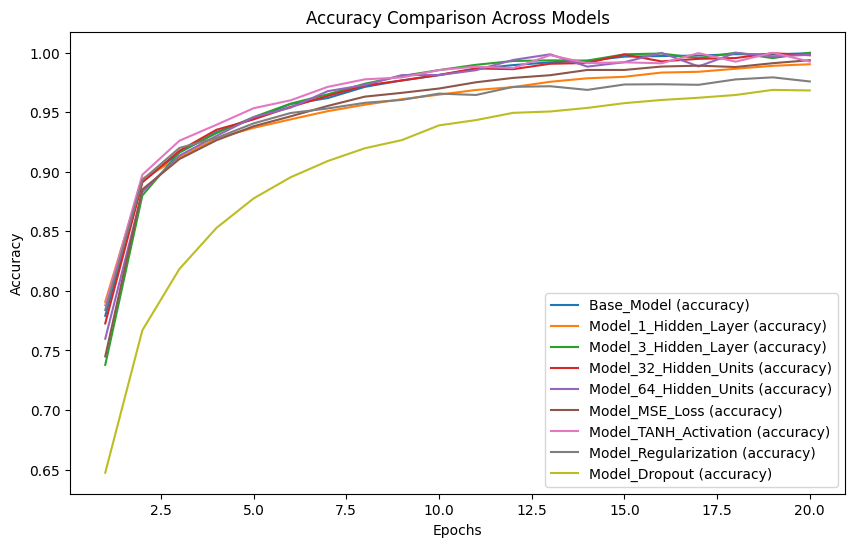

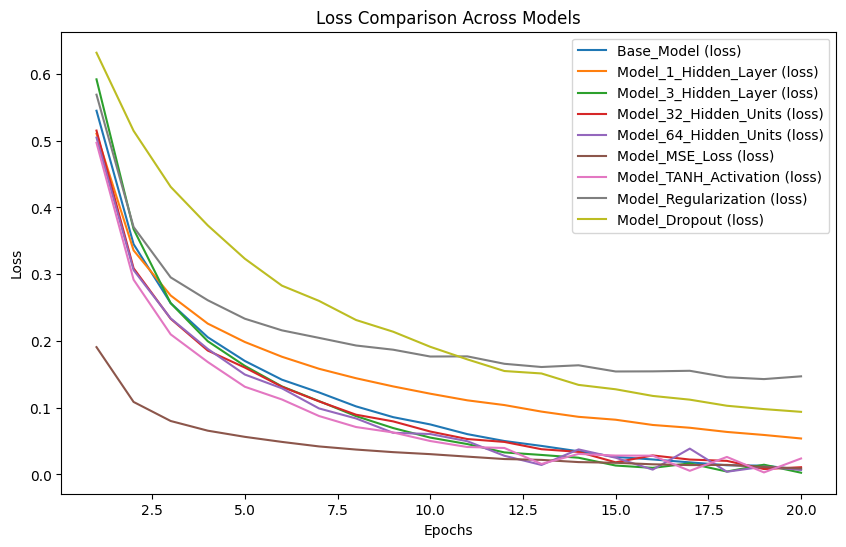

In [83]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Base Model | 0.28      | 0.89          |
| 1HL      | 0.28      | 0.89          |
| 3HL      | 0.37      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.29      | 0.88          |
| MSE      | 0.09      | 0.88          |
| Tanh     | 0.28      | 0.88          |
| L2       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |